# Statistics for Project

In [1]:
# Imported packages
import numpy as np
import statistics
from statistics import stdev 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from numpy import array
from numpy import cov
from statsmodels.tsa.stattools import grangercausalitytests
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
data_orig = pd.read_csv('Capstone_Data_Edit.csv')
#data = data_orig.drop(['Year'], axis=1)
data = data_orig

#change Date into DateTime data type and make it index
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
#double check in .info() that change was made--change made
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)

#Removing the commas from "volume" feaures
data[['CORN_Volume','WEAT_Volume','CANE_Volume','HSY_Volume',
      'SJM_Volume','GIS_Volume','PEP_Volume','CPB_Volume']]  = data[['CORN_Volume','WEAT_Volume','CANE_Volume','HSY_Volume',
      'SJM_Volume','GIS_Volume','PEP_Volume','CPB_Volume']].replace(',', '', regex=True)

#change objects to float
data['CORN_Volume'] = data.CORN_Volume.astype(float)
data['WEAT_Volume'] = data.WEAT_Volume.astype(float)
data['CANE_Volume'] = data.CANE_Volume.astype(float)
data['HSY_Volume'] = data.HSY_Volume.astype(float)
data['SJM_Volume'] = data.SJM_Volume.astype(float)
data['GIS_Volume'] = data.GIS_Volume.astype(float)
data['PEP_Volume'] = data.PEP_Volume.astype(float)
data['CPB_Volume'] = data.CPB_Volume.astype(float)


data.head(5)

,Month,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,2012,0.5,36.12,2.09,42.73,42.99,42.18,42.62,114100.0,...,66.86,67.19,66.36,66.40,5348800.0,33.50,33.69,32.93,32.98,1854500.0
2012-01-04,January,2012,0.5,36.12,2.09,42.79,42.95,42.20,42.51,43900.0,...,66.41,66.84,66.12,66.74,6042400.0,33.00,33.18,32.66,32.73,1721200.0
2012-01-05,January,2012,0.5,36.12,2.09,42.25,42.25,41.35,41.51,87400.0,...,66.58,66.67,66.12,66.22,4909100.0,32.69,32.73,31.80,31.81,4621400.0
2012-01-06,January,2012,0.5,36.12,2.09,41.72,41.80,41.26,41.35,31000.0,...,66.27,66.27,65.29,65.39,6533000.0,31.75,31.83,31.22,31.45,4981500.0
2012-01-09,January,2012,0.5,36.12,2.09,42.05,42.52,41.87,42.19,153700.0,...,65.26,65.83,65.01,65.73,5859600.0,31.53,31.91,31.50,31.83,1759800.0


In [3]:
#resample data monthly
data_month = data.resample('1M').mean()
data_month.head(5)

,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,2012,0.50,36.12,2.09,40.720000,40.960000,40.324000,40.692000,80610.000000,21.540000,...,65.713000,66.024500,65.318000,65.713500,6.035210e+06,32.047000,32.245000,31.769000,32.000000,2.365130e+06
2012-02-29,2012,0.49,37.51,1.85,40.672500,40.953500,40.368000,40.683000,37830.000000,21.396000,...,64.337500,64.584500,64.001500,64.281500,1.069150e+07,32.365000,32.653500,32.220000,32.421000,2.204535e+06
2012-03-31,2012,0.57,50.41,2.87,40.433182,40.689545,40.016364,40.267727,69286.363636,21.106818,...,64.212273,64.576364,64.023182,64.363182,6.296368e+06,32.960000,33.147727,32.810000,32.980000,1.668545e+06
2012-04-30,2012,0.71,54.68,2.23,38.630000,38.854500,38.233500,38.486500,43535.000000,20.317000,...,65.980500,66.303500,65.763000,66.039500,6.023460e+06,33.523500,33.699500,33.350500,33.545500,1.967345e+06
2012-05-31,2012,0.77,63.45,2.50,36.822273,37.153182,36.450455,36.770909,34081.818182,19.753182,...,67.401364,67.927727,67.112727,67.561364,8.494041e+06,33.455455,33.649091,33.213636,33.393182,2.120605e+06


# Research Questions 1-2
**1. What relationship (if any) exists between climate factors and commodity stocks?** <br/>
**2. What relationship (if any) exists between climate factors and company stocks?** <br/>


### Stock_Close

Text(0.5,1,'Correlation Heatmap: Monthly Close')

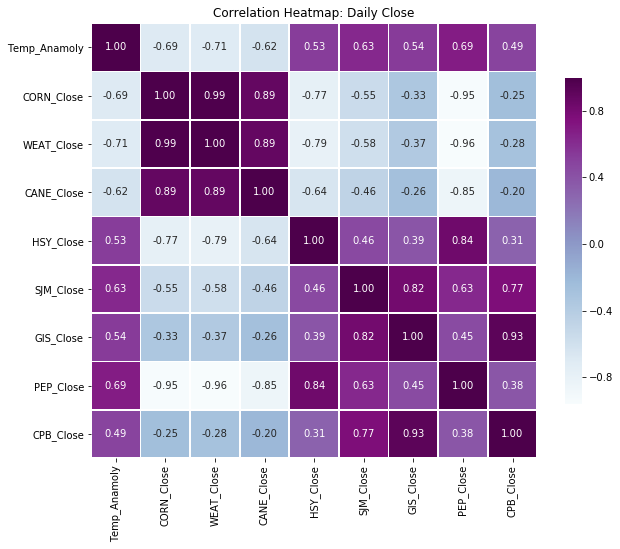

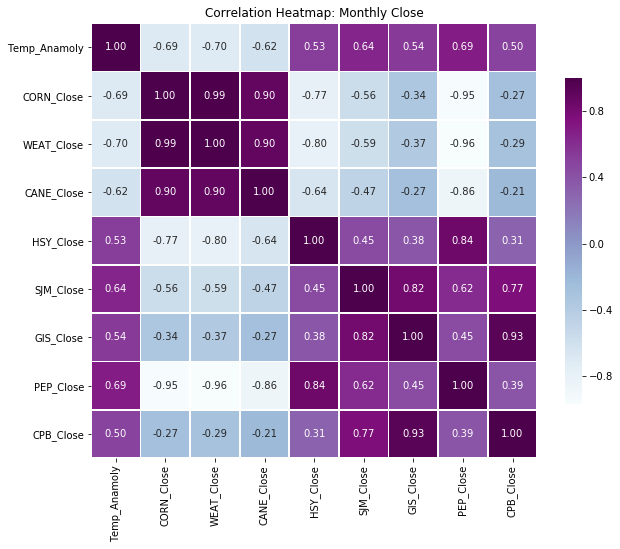

In [4]:
#correlation between daily stock_Close and Temp_Anamoly

#negative moderate: CORN, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#negative high: WEAT
stock_per_change = data[['Temp_Anamoly','CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Close')

#negative moderate: CORN, WEAT, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#correlation between monthly stock_Close and Temp_Anamoly
stock_per_change = data_month[['Temp_Anamoly','CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Close')


## Calculations from Stock_Close features

### Profit
- profit = (Stock_Close x Volume)

In [5]:
#calculate daily profit for each stock 
data['CORN_profit'] = data['CORN_Close'] * data['CORN_Volume']
data['WEAT_profit'] = data['WEAT_Close'] * data['WEAT_Volume']
data['CANE_profit'] = data['CANE_Close'] * data['CANE_Volume']
data['HSY_profit'] = data['HSY_Close'] * data['HSY_Volume']
data['SJM_profit'] = data['SJM_Close'] * data['SJM_Volume']
data['GIS_profit'] = data['GIS_Close'] * data['GIS_Volume']
data['PEP_profit'] = data['PEP_Close'] * data['PEP_Volume']
data['CPB_profit'] = data['CPB_Close'] * data['CPB_Volume']

#calculate monthly profit for each stock 
data_month['CORN_profit'] = data_month['CORN_Close'] * data_month['CORN_Volume']
data_month['WEAT_profit'] = data_month['WEAT_Close'] * data_month['WEAT_Volume']
data_month['CANE_profit'] = data_month['CANE_Close'] * data_month['CANE_Volume']
data_month['HSY_profit'] = data_month['HSY_Close'] * data_month['HSY_Volume']
data_month['SJM_profit'] = data_month['SJM_Close'] * data_month['SJM_Volume']
data_month['GIS_profit'] = data_month['GIS_Close'] * data_month['GIS_Volume']
data_month['PEP_profit'] = data_month['PEP_Close'] * data_month['PEP_Volume']
data_month['CPB_profit'] = data_month['CPB_Close'] * data_month['CPB_Volume']

Text(0.5,1,'Correlation Heatmap: Monthly Profit')

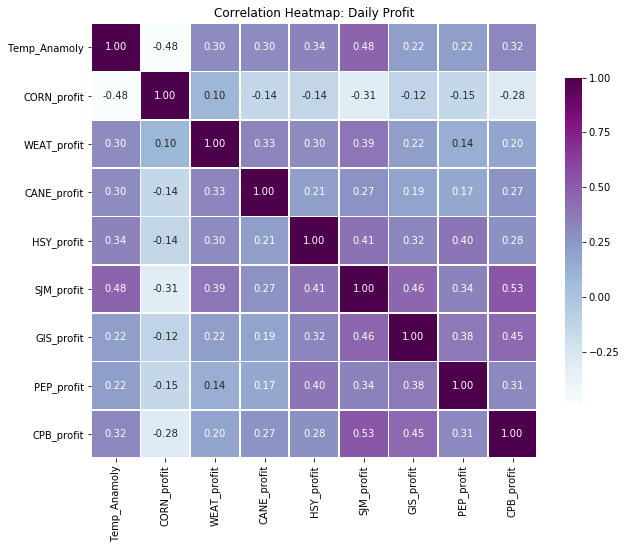

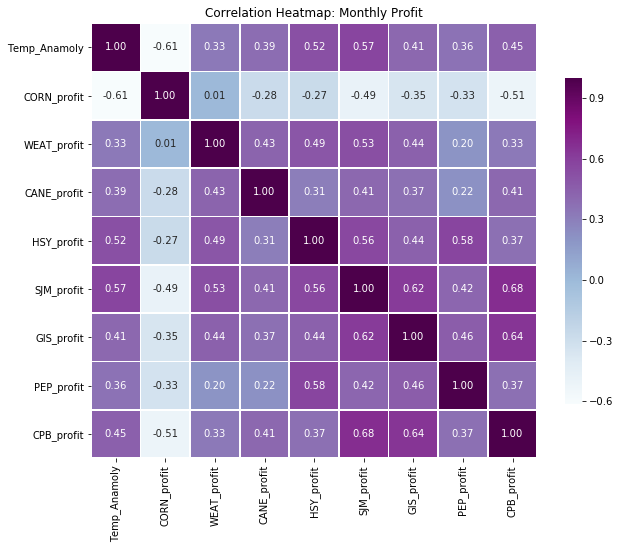

In [6]:
#correlation between daily profit and Temp_Anamoly

##low correlation between daily profit and Temp_Anamoly
stock_per_change = data[['Temp_Anamoly','CORN_profit','WEAT_profit','CANE_profit','HSY_profit','SJM_profit','GIS_profit','PEP_profit','CPB_profit']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Profit')

##low correlation between Temp_Anamoly and Daily profit for WEAT, CANE, GIS, PEP, CPB
##moderate correlation between Temp_Anamoly and Daily profit for CORN, HSY, SJM, 
stock_per_change = data_month[['Temp_Anamoly','CORN_profit','WEAT_profit','CANE_profit','HSY_profit','SJM_profit','GIS_profit','PEP_profit','CPB_profit']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Profit')

### Return
- return = (p/p-1)-1
- measure of a company's profitability
- profit/loss made by the stock 

In [7]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#calculate daily return for stocks
#return = (p/p-1)-1

data['CORN_return'] = data['CORN_Close'].pct_change(1)
data['WEAT_return'] = data['WEAT_Close'].pct_change(1)
data['CANE_return'] = data['CANE_Close'].pct_change(1)
data['HSY_return'] = data['HSY_Close'].pct_change(1)
data['SJM_return'] = data['SJM_Close'].pct_change(1)
data['GIS_return'] = data['GIS_Close'].pct_change(1)
data['PEP_return'] = data['PEP_Close'].pct_change(1)
data['CPB_return'] = data['CPB_Close'].pct_change(1)

#fill in NaN
data['CORN_return'].fillna(method='bfill', inplace = True)
data['WEAT_return'].fillna(method='bfill', inplace = True)
data['CANE_return'].fillna(method='bfill', inplace = True)
data['HSY_return'].fillna(method='bfill', inplace = True)
data['SJM_return'].fillna(method='bfill', inplace = True)
data['GIS_return'].fillna(method='bfill', inplace = True)
data['PEP_return'].fillna(method='bfill', inplace = True)
data['CPB_return'].fillna(method='bfill', inplace = True)

#calculate monthly return for stocks
data_month['CORN_return'] = data_month['CORN_Close'].pct_change(1)
data_month['WEAT_return'] = data_month['WEAT_Close'].pct_change(1)
data_month['CANE_return'] = data_month['CANE_Close'].pct_change(1)
data_month['HSY_return'] = data_month['HSY_Close'].pct_change(1)
data_month['SJM_return'] = data_month['SJM_Close'].pct_change(1)
data_month['GIS_return'] = data_month['GIS_Close'].pct_change(1)
data_month['PEP_return'] = data_month['PEP_Close'].pct_change(1)
data_month['CPB_return'] = data_month['CPB_Close'].pct_change(1)

#fill in NaN
data_month['CORN_return'].fillna(method='bfill', inplace = True)
data_month['WEAT_return'].fillna(method='bfill', inplace = True)
data_month['CANE_return'].fillna(method='bfill', inplace = True)
data_month['HSY_return'].fillna(method='bfill', inplace = True)
data_month['SJM_return'].fillna(method='bfill', inplace = True)
data_month['GIS_return'].fillna(method='bfill', inplace = True)
data_month['PEP_return'].fillna(method='bfill', inplace = True)
data_month['CPB_return'].fillna(method='bfill', inplace = True)

Text(0.5,1,'Correlation Heatmap: Monthly Return')

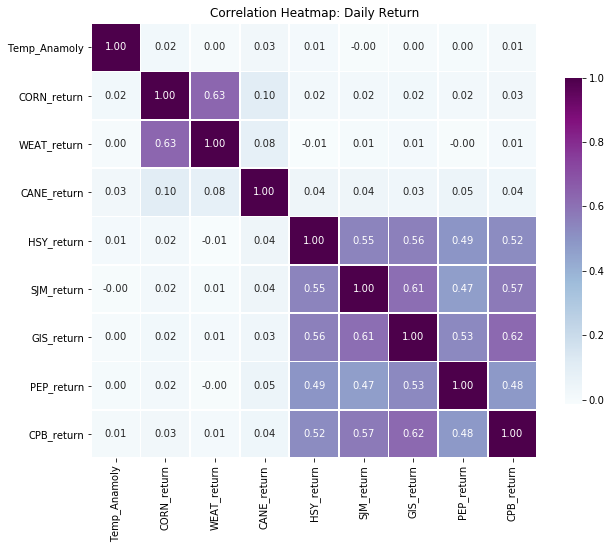

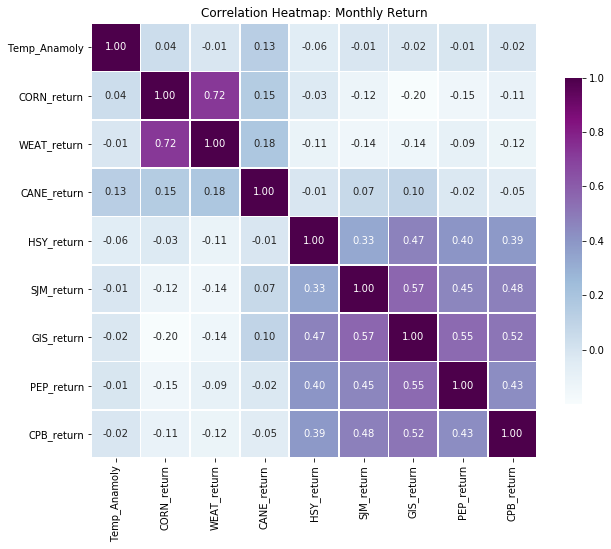

In [8]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce

#correlation between daily return values in stocks
#no correlation of Temp_Anamoly and daily stock return
stock_per_change = data[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Return')

#correlation between daily return values in stocks
#no correlation between Temp_Anamoly and monthly stock return
stock_per_change = data_month[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Monthly Return')

### Cumulative Returns
- Cumulative return is the return computed relative to the day investment
- If the cumulative return is above one-make a profit

In [9]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce

#cumulative returns for daily data
#Cumulative return is computed relative to the day investment. 
#If the cumulative return is above one-make a profit--anything else is a loss

data['CORN_cum_return'] = (1 + data['CORN_return']).cumprod()
data['WEAT_cum_return'] = (1 + data['WEAT_return']).cumprod()
data['CANE_cum_return'] = (1 + data['CANE_return']).cumprod()
data['HSY_cum_return'] = (1 + data['HSY_return']).cumprod()
data['SJM_cum_return'] = (1 + data['SJM_return']).cumprod()
data['GIS_cum_return'] = (1 + data['GIS_return']).cumprod()
data['PEP_cum_return'] = (1 + data['PEP_return']).cumprod()
data['CPB_cum_return'] = (1 + data['CPB_return']).cumprod()

#fill in NaN
data['CORN_cum_return'].fillna(method='bfill', inplace = True)
data['WEAT_cum_return'].fillna(method='bfill', inplace = True)
data['CANE_cum_return'].fillna(method='bfill', inplace = True)
data['HSY_cum_return'].fillna(method='bfill', inplace = True)
data['SJM_cum_return'].fillna(method='bfill', inplace = True)
data['GIS_cum_return'].fillna(method='bfill', inplace = True)
data['PEP_cum_return'].fillna(method='bfill', inplace = True)
data['CPB_cum_return'].fillna(method='bfill', inplace = True)

#cumulative return for monthly data
data_month['CORN_cum_return'] = (1 + data_month['CORN_return']).cumprod()
data_month['WEAT_cum_return'] = (1 + data_month['WEAT_return']).cumprod()
data_month['CANE_cum_return'] = (1 + data_month['CANE_return']).cumprod()
data_month['HSY_cum_return'] = (1 + data_month['HSY_return']).cumprod()
data_month['SJM_cum_return'] = (1 + data_month['SJM_return']).cumprod()
data_month['GIS_cum_return'] = (1 + data_month['GIS_return']).cumprod()
data_month['PEP_cum_return'] = (1 + data_month['PEP_return']).cumprod()
data_month['CPB_cum_return'] = (1 + data_month['CPB_return']).cumprod()

#fill in NaN
data['CORN_cum_return'].fillna(method='bfill', inplace = True)
data['WEAT_cum_return'].fillna(method='bfill', inplace = True)
data['CANE_cum_return'].fillna(method='bfill', inplace = True)
data['HSY_cum_return'].fillna(method='bfill', inplace = True)
data['SJM_cum_return'].fillna(method='bfill', inplace = True)
data['GIS_cum_return'].fillna(method='bfill', inplace = True)
data['PEP_cum_return'].fillna(method='bfill', inplace = True)
data['CPB_cum_return'].fillna(method='bfill', inplace = True)

Text(0.5,1,'Correlation Heatmap: Cumulative Return Monthly')

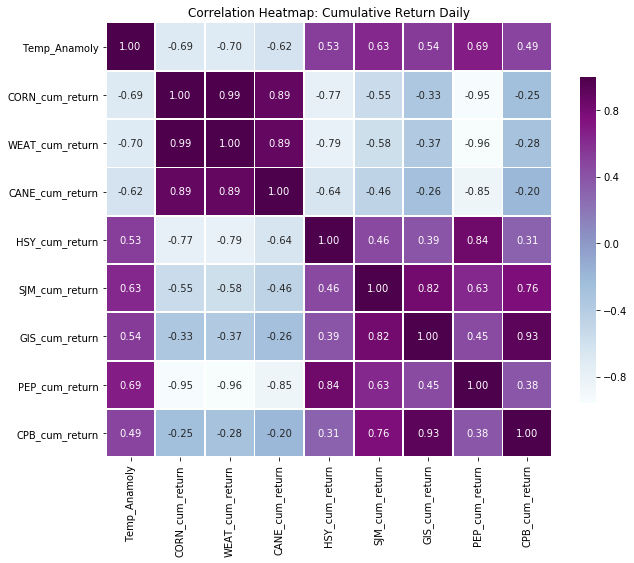

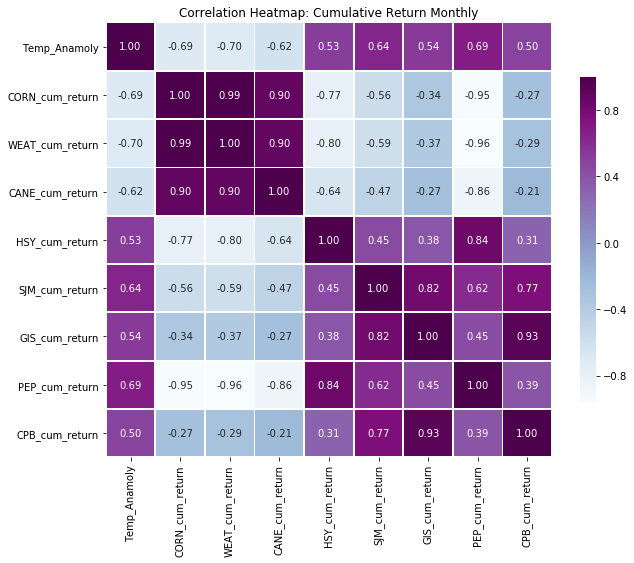

In [10]:
#Correlation with cumulative return
#moderate negative correlation of Temp_Anamoly with stock cumulative return

stock_per_change = data[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Cumulative Return Daily')

#cumualtive return sorted by month
#moderate negative correlation
stock_per_change = data_month[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Cumulative Return Monthly')

### Covariance
- https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/
- Measure of the joint probability for two random variables--describes how two variables change together
- The sign of the covariance can be interpreted as whether the two variables increase together (positive) or decrease together (negative). 
- **A covariance value of zero indicates that both variables are completely independent**
- https://corporatefinanceinstitute.com/resources/knowledge/finance/covariance/
    - positive = variables move in the same direction
    - negative =  variable move in opposite directions (inverse relationship)
    
- [Evaluating with stocks](https://www.investopedia.com/terms/c/covariance.asp#:~:text=Covariance%20measures%20the%20directional%20relationship,covariance%20means%20they%20move%20inversely.)
- with stocks, if covariance is negative, this means that the stock will behave in the inverse of your target stock
- in our case if temp_anmoloy decreases, and our covariance is negative, our company or comody stock will oncrease
- here we want a negative covariance since we believe climate change(temp_anamoly) is negatively effecting the stock market. 

In [11]:
#finding the covariance for all daily stock close features
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['Temp_Anamoly'])
b = array(data['CORN_Close'])
c = array(data['WEAT_Close'])
d = array(data['CANE_Close'])
e = array(data['HSY_Close'])
f = array(data['SJM_Close'])
g = array(data['GIS_Close'])
h = array(data['PEP_Close'])
i = array(data['CPB_Close'])

j = array(data['CORN_profit'])
k = array(data['WEAT_profit'])
l = array(data['CANE_profit'])
m = array(data['HSY_profit'])
n = array(data['SJM_profit'])
o = array(data['GIS_profit'])
p = array(data['PEP_profit'])
q = array(data['CPB_profit'])

r = array(data['CORN_return'])
s = array(data['WEAT_return'])
t = array(data['CANE_return'])
u = array(data['HSY_return'])
v = array(data['SJM_return'])
w = array(data['GIS_return'])
x = array(data['PEP_return'])
y = array(data['CPB_return'])

z = array(data['CORN_cum_return'])
aa = array(data['WEAT_cum_return'])
bb = array(data['CANE_cum_return'])
cc = array(data['HSY_cum_return'])
dd = array(data['SJM_cum_return'])
ee = array(data['GIS_cum_return'])
ff = array(data['PEP_cum_return'])
gg = array(data['CPB_cum_return'])

print('Daily Covariance Temp_Anamoly V Stock')
print('CORN')
covariance1a = cov(a,b)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance1a)
covariance1b = cov(a,j)[0,1]
print('Covariance of Temp_Anamoly and CORN_profit',covariance1b)
covariance1c = cov(a,r)[0,1]
print('Covariance of Temp_Anamoly and CORN_return',covariance1c)
covariance1d = cov(a,z)[0,1]
print('Covariance of Temp_Anamoly and CORN_cum_return',covariance1d)

print('WEAT')
covariance2a = cov(a,c)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance2a)
covariance2b = cov(a,k)[0,1]
print('Covariance of Temp_Anamoly and WEAT_profit',covariance2b)
covariance2c = cov(a,s)[0,1]
print('Covariance of Temp_Anamoly and WEAT_return',covariance2c)
covariance2d = cov(a,aa)[0,1]
print('Covariance of Temp_Anamoly and WEAT_cum_return',covariance2d)

print('CANE')
covariance3a = cov(a,d)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance3a)
covariance3b = cov(a,l)[0,1]
print('Covariance of Temp_Anamoly and CANE_profit',covariance3b)
covariance3c = cov(a,t)[0,1]
print('Covariance of Temp_Anamoly and CANE_return',covariance3c)
covariance3d = cov(a,bb)[0,1]
print('Covariance of Temp_Anamoly and CANE_cum_return',covariance3d)

print('HSY')
covariance4a = cov(a,e)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance4a)
covariance4b = cov(a,m)[0,1]
print('Covariance of Temp_Anamoly and HSY_profit',covariance4b)
covariance4c = cov(a,u)[0,1]
print('Covariance of Temp_Anamoly and HSY_return',covariance4c)
covariance4d = cov(a,cc)[0,1]
print('Covariance of Temp_Anamoly and HSY_cum_return',covariance4d)

print('SJM')
covariance5a = cov(a,f)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance5a)
covariance5b = cov(a,n)[0,1]
print('Covariance of Temp_Anamoly and SJM_profit',covariance5b)
covariance5c = cov(a,v)[0,1]
print('Covariance of Temp_Anamoly and SJM_return',covariance5c)
covariance5d = cov(a,dd)[0,1]
print('Covariance of Temp_Anamoly and SJM_cum_return',covariance5d)

print('GIS')
covariance6a = cov(a,g)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance6a)
covariance6b = cov(a,o)[0,1]
print('Covariance of Temp_Anamoly and GIS_profit',covariance6b)
covariance6c = cov(a,w)[0,1]
print('Covariance of Temp_Anamoly and GIS_return',covariance6c)
covariance6d = cov(a,ee)[0,1]
print('Covariance of Temp_Anamoly and GIS_cum_return',covariance6d)

print('PEP')
covariance7a = cov(a,h)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance7a)
covariance7b = cov(a,p)[0,1]
print('Covariance of Temp_Anamoly and PEP_profit',covariance7b)
covariance7c = cov(a,x)[0,1]
print('Covariance of Temp_Anamoly and PEP_return',covariance7c)
covariance7d = cov(a,ff)[0,1]
print('Covariance of Temp_Anamoly and PEP_cum_return',covariance7d)

print('CPB')
covariance8a = cov(a,i)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance8a)
covariance8b = cov(a,q)[0,1]
print('Covariance of Temp_Anamoly and CPB_profit',covariance8b)
covariance8c = cov(a,y)[0,1]
print('Covariance of Temp_Anamoly and CPB_return',covariance8c)
covariance8d = cov(a,gg)[0,1]
print('Covariance of Temp_Anamoly and CPB_cum_return',covariance8d)

Daily Covariance Temp_Anamoly V Stock
CORN
Covariance of Temp_Anamoly and CORN_Close -1.1382527258379114
Covariance of Temp_Anamoly and CORN_profit -185198.49115541205
Covariance of Temp_Anamoly and CORN_return 1.58504856322183e-06
Covariance of Temp_Anamoly and CORN_cum_return -0.026638079653732535
WEAT
Covariance of Temp_Anamoly and WEAT_Close -0.6546277128131264
Covariance of Temp_Anamoly and WEAT_profit 18350.600169989517
Covariance of Temp_Anamoly and WEAT_return -3.987159343439306e-06
Covariance of Temp_Anamoly and WEAT_cum_return -0.02880897835283191
CANE
Covariance of Temp_Anamoly and CANE_Close -0.4485527336231245
Covariance of Temp_Anamoly and CANE_profit 7057.7236892592755
Covariance of Temp_Anamoly and CANE_return 6.571187004042887e-05
Covariance of Temp_Anamoly and CANE_cum_return -0.019250270029464008
HSY
Covariance of Temp_Anamoly and HSY_Close 1.5061099678903205
Covariance of Temp_Anamoly and HSY_profit 2172184.3649157216
Covariance of Temp_Anamoly and HSY_return -1.299

In [12]:
#finding the covariance for all monthly stock close features
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a1 = array(data_month['Temp_Anamoly'])
b1 = array(data_month['CORN_Close'])
c1 = array(data_month['WEAT_Close'])
d1 = array(data_month['CANE_Close'])
e1 = array(data_month['HSY_Close'])
f1 = array(data_month['SJM_Close'])
g1 = array(data_month['GIS_Close'])
h1 = array(data_month['PEP_Close'])
i1 = array(data_month['CPB_Close'])

j1 = array(data_month['CORN_profit'])
k1= array(data_month['WEAT_profit'])
l1 = array(data_month['CANE_profit'])
m1 = array(data_month['HSY_profit'])
n1 = array(data_month['SJM_profit'])
o1 = array(data_month['GIS_profit'])
p1 = array(data_month['PEP_profit'])
q1 = array(data_month['CPB_profit'])

r1 = array(data_month['CORN_return'])
s1 = array(data_month['WEAT_return'])
t1 = array(data_month['CANE_return'])
u1 = array(data_month['HSY_return'])
v1 = array(data_month['SJM_return'])
w1 = array(data_month['GIS_return'])
x1 = array(data_month['PEP_return'])
y1 = array(data_month['CPB_return'])

z1 = array(data_month['CORN_cum_return'])
aa1 = array(data_month['WEAT_cum_return'])
bb1 = array(data_month['CANE_cum_return'])
cc1 = array(data_month['HSY_cum_return'])
dd1 = array(data_month['SJM_cum_return'])
ee1 = array(data_month['GIS_cum_return'])
ff1 = array(data_month['PEP_cum_return'])
gg1 = array(data_month['CPB_cum_return'])

print('Monthly Covariance Temp_Anamoly V Stock')
print('CORN')
covariance1a = cov(a1,b1)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance1a)
covariance1b = cov(a1,j1)[0,1]
print('Covariance of Temp_Anamoly and CORN_profit',covariance1b)
covariance1c = cov(a1,r1)[0,1]
print('Covariance of Temp_Anamoly and CORN_return',covariance1c)
covariance1d = cov(a1,z1)[0,1]
print('Covariance of Temp_Anamoly and CORN_cum_return',covariance1d)

print('WEAT')
covariance2a = cov(a1,c1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance2a)
covariance2b = cov(a1,k1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_profit',covariance2b)
covariance2c = cov(a1,s1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_return',covariance2c)
covariance2d = cov(a1,aa1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_cum_return',covariance2d)

print('CANE')
covariance3a = cov(a1,d1)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance3a)
covariance3b = cov(a1,l1)[0,1]
print('Covariance of Temp_Anamoly and CANE_profit',covariance3b)
covariance3c = cov(a1,t1)[0,1]
print('Covariance of Temp_Anamoly and CANE_return',covariance3c)
covariance3d = cov(a1,bb1)[0,1]
print('Covariance of Temp_Anamoly and CANE_cum_return',covariance3d)

print('HSY')
covariance4a = cov(a1,e1)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance4a)
covariance4b = cov(a1,m1)[0,1]
print('Covariance of Temp_Anamoly and HSY_profit',covariance4b)
covariance4c = cov(a1,u1)[0,1]
print('Covariance of Temp_Anamoly and HSY_return',covariance4c)
covariance4d = cov(a1,cc1)[0,1]
print('Covariance of Temp_Anamoly and HSY_cum_return',covariance4d)

print('SJM')
covariance5a = cov(a1,f1)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance5a)
covariance5b = cov(a1,n1)[0,1]
print('Covariance of Temp_Anamoly and SJM_profit',covariance5b)
covariance5c = cov(a1,v1)[0,1]
print('Covariance of Temp_Anamoly and SJM_return',covariance5c)
covariance5d = cov(a1,dd1)[0,1]
print('Covariance of Temp_Anamoly and SJM_cum_return',covariance5d)

print('GIS')
covariance6a = cov(a1,g1)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance6a)
covariance6b = cov(a1,o1)[0,1]
print('Covariance of Temp_Anamoly and GIS_profit',covariance6b)
covariance6c = cov(a1,w1)[0,1]
print('Covariance of Temp_Anamoly and GIS_return',covariance6c)
covariance6d = cov(a1,ee1)[0,1]
print('Covariance of Temp_Anamoly and GIS_cum_return',covariance6d)

print('PEP')
covariance7a = cov(a1,h1)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance7a)
covariance7b = cov(a1,p1)[0,1]
print('Covariance of Temp_Anamoly and PEP_profit',covariance7b)
covariance7c = cov(a1,x1)[0,1]
print('Covariance of Temp_Anamoly and PEP_return',covariance7c)
covariance7d = cov(a1,ff1)[0,1]
print('Covariance of Temp_Anamoly and PEP_cum_return',covariance7d)

print('CPB')
covariance8a = cov(a1,i1)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance8a)
covariance8b = cov(a1,q1)[0,1]
print('Covariance of Temp_Anamoly and CPB_profit',covariance8b)
covariance8c = cov(a1,y1)[0,1]
print('Covariance of Temp_Anamoly and CPB_return',covariance8c)
covariance8d = cov(a1,gg1)[0,1]
print('Covariance of Temp_Anamoly and CPB_cum_return',covariance8d)

Monthly Covariance Temp_Anamoly V Stock
CORN
Covariance of Temp_Anamoly and CORN_Close -1.1534558774493961
Covariance of Temp_Anamoly and CORN_profit -186579.36027291414
Covariance of Temp_Anamoly and CORN_return -0.0002918565636518181
Covariance of Temp_Anamoly and CORN_cum_return -0.02833974155487258
WEAT
Covariance of Temp_Anamoly and WEAT_Close -0.6632624820760709
Covariance of Temp_Anamoly and WEAT_profit 18759.492932628662
Covariance of Temp_Anamoly and WEAT_return -0.00024469088294407207
Covariance of Temp_Anamoly and WEAT_cum_return -0.030627763199485486
CANE
Covariance of Temp_Anamoly and CANE_Close -0.45565727374435633
Covariance of Temp_Anamoly and CANE_profit 6943.182995942329
Covariance of Temp_Anamoly and CANE_return 0.0016354301794104596
Covariance of Temp_Anamoly and CANE_cum_return -0.019536560256708507
HSY
Covariance of Temp_Anamoly and HSY_Close 1.518272665763923
Covariance of Temp_Anamoly and HSY_profit 2217897.224792651
Covariance of Temp_Anamoly and HSY_return -0.

### Granger Causality
- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
- used to determine if one time series will be useful to forecast another

Reading the test:
- (https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
- The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. 
- If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

- https://www.statisticshowto.com/granger-causality/
- 'caused' when dealing with granger causality really means a particular variable comes before another in the time series
- here we are saying that Temp_Anamoly comes before Stock_Close, so irregularities in Stock_Close data will be caused by Temp_Anamoly

[Test Explained:](https://www.youtube.com/watch?v=ZUv7T8iPGrc)
- y is a function of the lag of x, not x itself

### Null hyp: Stock_Close is not Granger caused by Temp Anamoly

In [13]:
#evaluation if the daily closing price for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_Close',grangercausalitytests(data[['Temp_Anamoly','CORN_Close']], maxlag=4)) #reject NULL
print('WEAT_Close',grangercausalitytests(data[['Temp_Anamoly','WEAT_Close']], maxlag=4)) #reject NULL
print('CANE_Close',grangercausalitytests(data[['Temp_Anamoly','CANE_Close']], maxlag=4)) #ACCEPT NULL
print('HSY_Close',grangercausalitytests(data[['Temp_Anamoly','HSY_Close']], maxlag=4)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data[['Temp_Anamoly','SJM_Close']], maxlag=4)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data[['Temp_Anamoly','GIS_Close']], maxlag=4)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data[['Temp_Anamoly','PEP_Close']], maxlag=4)) #reject NULL
print('CPB_Close',grangercausalitytests(data[['Temp_Anamoly','CPB_Close']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=19.6169 , p=0.0001  , df=2
likelihood ratio test: chi2=19.5218 , p=0.0001  , df=2
parameter F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=20.1823 , p=0.0002  , df=3
likelihood ratio test: chi2=20.0816 , p=0.0002  , df=3
parameter F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.2012  , p=0.

In [14]:
#evaluation if the monthly closing price for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_Close',grangercausalitytests(data_month[['Temp_Anamoly','CORN_Close']], maxlag=4)) #reject NULL
print('WEAT_Close',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_Close']], maxlag=4)) #reject NULL
print('CANE_Close',grangercausalitytests(data_month[['Temp_Anamoly','CANE_Close']], maxlag=4)) #reject NULL
print('HSY_Close',grangercausalitytests(data_month[['Temp_Anamoly','HSY_Close']], maxlag=4)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data_month[['Temp_Anamoly','SJM_Close']], maxlag=4)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data_month[['Temp_Anamoly','GIS_Close']], maxlag=4)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data_month[['Temp_Anamoly','PEP_Close']], maxlag=4)) #ACCEPT NULL
print('CPB_Close',grangercausalitytests(data_month[['Temp_Anamoly','CPB_Close']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=8.2404  , p=0.0041  , df=1
likelihood ratio test: chi2=7.9024  , p=0.0049  , df=1
parameter F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=7.3512  , p=0.0253  , df=2
likelihood ratio test: chi2=7.0779  , p=0.0290  , df=2
parameter F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=9.4935  , p=0.0234  , df=3
likelihood ratio test: chi2=9.0396  , p=0.0288  , df=3
parameter F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1385  , p=0.0832  , df_d

### Null hyp: Stock_profit is not granger caused by Temp_Anamoly

In [15]:
#evaluation if the daily closing profit for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_profit',grangercausalitytests(data[['Temp_Anamoly','CORN_profit']], maxlag=4)) #accept NULL
print('WEAT_profit',grangercausalitytests(data[['Temp_Anamoly','WEAT_profit']], maxlag=4)) #accept NULL
print('CANE_profit',grangercausalitytests(data[['Temp_Anamoly','CANE_profit']], maxlag=4)) #accept NULL
print('HSY_profit',grangercausalitytests(data[['Temp_Anamoly','HSY_profit']], maxlag=4)) #accept NULL
print('SJM_profit',grangercausalitytests(data[['Temp_Anamoly','SJM_profit']], maxlag=4)) #accept NULL
print('GIS_profit',grangercausalitytests(data[['Temp_Anamoly','GIS_profit']], maxlag=4)) #accept NULL
print('PEP_profit',grangercausalitytests(data[['Temp_Anamoly','PEP_profit']], maxlag=4)) #accept NULL
print('CPB_profit',grangercausalitytests(data[['Temp_Anamoly','CPB_profit']], maxlag=4)) #accept NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2864  , p=0.5926  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.2868  , p=0.5923  , df=1
likelihood ratio test: chi2=0.2868  , p=0.5923  , df=1
parameter F test:         F=0.2864  , p=0.5926  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1515  , p=0.8594  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=0.3038  , p=0.8591  , df=2
likelihood ratio test: chi2=0.3038  , p=0.8591  , df=2
parameter F test:         F=0.1515  , p=0.8594  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1150  , p=0.9513  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=0.3463  , p=0.9511  , df=3
likelihood ratio test: chi2=0.3463  , p=0.9511  , df=3
parameter F test:         F=0.1150  , p=0.9513  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1886  , p=0.

In [16]:
#evaluation if the monthly closing profit for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_profit',grangercausalitytests(data_month[['Temp_Anamoly','CORN_profit']], maxlag=4)) #accept NULL
print('WEAT_profit',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_profit']], maxlag=4)) #accept NULL
print('CANE_profit',grangercausalitytests(data_month[['Temp_Anamoly','CANE_profit']], maxlag=4)) #accept NULL
print('HSY_profit',grangercausalitytests(data_month[['Temp_Anamoly','HSY_profit']], maxlag=4)) #reject NULL
print('SJM_profit',grangercausalitytests(data_month[['Temp_Anamoly','SJM_profit']], maxlag=4)) #accept NULL
print('GIS_profit',grangercausalitytests(data_month[['Temp_Anamoly','GIS_profit']], maxlag=4)) #accept NULL
print('PEP_profit',grangercausalitytests(data_month[['Temp_Anamoly','PEP_profit']], maxlag=4)) #accept NULL
print('CPB_profit',grangercausalitytests(data_month[['Temp_Anamoly','CPB_profit']], maxlag=4)) #accept NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0325  , p=0.8573  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.0336  , p=0.8546  , df=1
likelihood ratio test: chi2=0.0336  , p=0.8546  , df=1
parameter F test:         F=0.0325  , p=0.8573  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0914  , p=0.9128  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.1930  , p=0.9080  , df=2
likelihood ratio test: chi2=0.1928  , p=0.9081  , df=2
parameter F test:         F=0.0914  , p=0.9128  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7229  , p=0.5411  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=2.3451  , p=0.5039  , df=3
likelihood ratio test: chi2=2.3160  , p=0.5095  , df=3
parameter F test:         F=0.7229  , p=0.5411  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3495  , p=0.8437  , df_d

### Null hyp: Stock_return is not granger caused by Temp_Anamoly

In [17]:
#evaluation if the daily return for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_return',grangercausalitytests(data[['Temp_Anamoly','CORN_return']], maxlag=4)) #reject NULL
print('WEAT_return',grangercausalitytests(data[['Temp_Anamoly','WEAT_return']], maxlag=4)) #reject NULL
print('CANE_return',grangercausalitytests(data[['Temp_Anamoly','CANE_return']], maxlag=4)) #ACCEPT NULL
print('HSY_return',grangercausalitytests(data[['Temp_Anamoly','HSY_return']], maxlag=4)) #ACCEPT NULL
print('SJM_return',grangercausalitytests(data[['Temp_Anamoly','SJM_return']], maxlag=4)) #ACCEPT NULL
print('GIS_return',grangercausalitytests(data[['Temp_Anamoly','GIS_return']], maxlag=4)) #ACCEPT NULL
print('PEP_return',grangercausalitytests(data[['Temp_Anamoly','PEP_return']], maxlag=4)) #ACCEPT NULL
print('CPB_return',grangercausalitytests(data[['Temp_Anamoly','CPB_return']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.7551 , p=0.0006  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=11.7726 , p=0.0006  , df=1
likelihood ratio test: chi2=11.7383 , p=0.0006  , df=1
parameter F test:         F=11.7551 , p=0.0006  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.0898  , p=0.0023  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=12.2099 , p=0.0022  , df=2
likelihood ratio test: chi2=12.1730 , p=0.0023  , df=2
parameter F test:         F=6.0898  , p=0.0023  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.4380  , p=0.0041  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=13.3606 , p=0.0039  , df=3
likelihood ratio test: chi2=13.3164 , p=0.0040  , df=3
parameter F test:         F=4.4380  , p=0.0041  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4654  , p=0.

In [18]:
#evaluation if the monthly return for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_return',grangercausalitytests(data_month[['Temp_Anamoly','CORN_return']], maxlag=4)) #ACCEPT NULL
print('WEAT_return',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_return']], maxlag=4)) #ACCEPT NULL
print('CANE_return',grangercausalitytests(data_month[['Temp_Anamoly','CANE_return']], maxlag=4)) #ACCEPT NULL
print('HSY_return',grangercausalitytests(data_month[['Temp_Anamoly','HSY_return']], maxlag=4)) #ACCEPT NULL
print('SJM_return',grangercausalitytests(data_month[['Temp_Anamoly','SJM_return']], maxlag=4)) #ACCEPT NULL
print('GIS_return',grangercausalitytests(data_month[['Temp_Anamoly','GIS_return']], maxlag=4)) #ACCEPT NULL
print('PEP_return',grangercausalitytests(data_month[['Temp_Anamoly','PEP_return']], maxlag=4)) #ACCEPT NULL
print('CPB_return',grangercausalitytests(data_month[['Temp_Anamoly','CPB_return']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0457  , p=0.8312  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.0472  , p=0.8281  , df=1
likelihood ratio test: chi2=0.0472  , p=0.8281  , df=1
parameter F test:         F=0.0457  , p=0.8312  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3314  , p=0.7188  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.7000  , p=0.7047  , df=2
likelihood ratio test: chi2=0.6974  , p=0.7056  , df=2
parameter F test:         F=0.3314  , p=0.7188  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3981  , p=0.7547  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=1.2914  , p=0.7312  , df=3
likelihood ratio test: chi2=1.2825  , p=0.7333  , df=3
parameter F test:         F=0.3981  , p=0.7547  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4275  , p=0.7884  , df_d

### Null hyp: Stock_cum_return is not granger caused by Temp_Anamoly

In [19]:
#evaluation if the cumulative return for the daily stock data is caused by Temp_Anamoly through Granger Causality
print('CORN_cum_return',grangercausalitytests(data[['Temp_Anamoly','CORN_cum_return']], maxlag=4)) #REJECT null
print('WEAT_cum_return',grangercausalitytests(data[['Temp_Anamoly','WEAT_cum_return']], maxlag=4)) #REJECT null
print('CANE_cum_return',grangercausalitytests(data[['Temp_Anamoly','CANE_cum_return']], maxlag=4)) #ACCEPT null
print('HSY_cum_return',grangercausalitytests(data[['Temp_Anamoly','HSY_cum_return']], maxlag=4)) #ACCEPT null
print('SJM_cum_return',grangercausalitytests(data[['Temp_Anamoly','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['Temp_Anamoly','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['Temp_Anamoly','PEP_cum_return']], maxlag=4)) #REJECT null
print('CPB_cum_return',grangercausalitytests(data[['Temp_Anamoly','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=19.6169 , p=0.0001  , df=2
likelihood ratio test: chi2=19.5218 , p=0.0001  , df=2
parameter F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=20.1823 , p=0.0002  , df=3
likelihood ratio test: chi2=20.0816 , p=0.0002  , df=3
parameter F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.2012  , p=0.

In [20]:
#evaluation if the cumulative return for the monthly stock data is caused by Temp_Anamoly through Granger Causality
print('CORN_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CORN_cum_return']], maxlag=4)) #REJECT null
print('WEAT_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_cum_return']], maxlag=4)) #REJECT null
print('CANE_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CANE_cum_return']], maxlag=4)) #REJECT null
print('HSY_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=8.2404  , p=0.0041  , df=1
likelihood ratio test: chi2=7.9024  , p=0.0049  , df=1
parameter F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=7.3512  , p=0.0253  , df=2
likelihood ratio test: chi2=7.0779  , p=0.0290  , df=2
parameter F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=9.4935  , p=0.0234  , df=3
likelihood ratio test: chi2=9.0396  , p=0.0288  , df=3
parameter F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1385  , p=0.0832  , df_d

# Research Question 4
**Does any volatility exist in the data that can associated with climate anomalies?**

### Volatility
- can be measured with regards to standard deviation
- using standard deviation, ways to incorporate stdev in investigating volaility: Bollinger Bands, Maximum Drawdown, 

**Factors Effecting Volatility**
- major weather event in area where commodity is produced
- large fluctuations in pricing does not necessarily mean decrease in stock
    - When volatility is high, both in terms of the broad market and in relative terms for a specific stock, traders who are bearish on the stock may buy puts on it based on the twin premises of “buy high, sell higher,” and “the trend is your friend.”

**Standard Deviation**
- use for looking at stock volatility: the stdev indicates how tightly the price of a stock is clustered around the mean or moving average
- [Stock Volatility](https://www.investopedia.com/ask/answers/021015/what-best-measure-given-stocks-volatility.asp): reflection of the degree to which price moves
    - stock with price that fluctuates wildly, hits new highs and lows, or moves erratically is considered highly volatile
    - stock that maintains a relatively stable price has low volatility
    - Larger standard deviations point to higher dispersions of returns as well as greater investment risk
    - a low standardeviation is close to the mean
- [When you hear that volatility of a stock increased from 20% to 30%, you have no idea whether the stock price actually went up or down. You can just conclude that its moves got bigger and more variable](https://www.macroption.com/price-volatility/)


**Taking StDev on Closing Price**
- HSY has largest standard deviation

In [21]:
#standard deviation on daily data
#https://www.linkedin.com/pulse/stock-analysis-using-python-tableau-kavin-soni-csm-
print('CORN')
print('StDev of CORN_Close', data['CORN_Close'].std())
print('StDev of CORN_profit', data['CORN_profit'].std())
print('StDev of CORN_return', data['CORN_return'].std())
print('StDev of CORN_cum_return', data['CORN_cum_return'].std())

print('WEAT')
print('StDev of WEAT_Close', data['WEAT_Close'].std())
print('StDev of WEAT_profit', data['WEAT_profit'].std())
print('StDev of WEAT_return', data['WEAT_return'].std())
print('StDev of WEAT_cum_return', data['WEAT_cum_return'].std())

print('CANE')
print('StDev of CANE_Close', data['CANE_Close'].std())
print('StDev of CANE_profit', data['CANE_profit'].std())
print('StDev of CANE_return', data['CANE_return'].std())
print('StDev of CANE_cum_return', data['CANE_cum_return'].std())

print('HSY')
print('StDev of HSY_Close', data['HSY_Close'].std())
print('StDev of HSY_profit', data['HSY_profit'].std())
print('StDev of HSY_return', data['HSY_return'].std())
print('StDev of HSY_cum_return', data['HSY_cum_return'].std())

print('SJM')
print('StDev of SJM_Close', data['SJM_Close'].std())
print('StDev of SJM_profit', data['SJM_profit'].std())
print('StDev of SJM_return', data['SJM_return'].std())
print('StDev of SJM_cum_return', data['SJM_cum_return'].std())

print('GIS')
print('StDev of GIS_Close', data['GIS_Close'].std())
print('StDev of GIS_profit', data['GIS_profit'].std())
print('StDev of GIS_return', data['GIS_return'].std())
print('StDev of GIS_cum_return', data['GIS_cum_return'].std())

print('PEP')
print('StDev of PEP_Close', data['PEP_Close'].std())
print('StDev of PEP_profit', data['PEP_profit'].std())
print('StDev of PEP_return', data['PEP_return'].std())
print('StDev of PEP_cum_return', data['PEP_cum_return'].std())

print('CPB')
print('StDev of CPB_Close', data['CPB_Close'].std())
print('StDev of CPB_profit', data['CPB_profit'].std())
print('StDev of CPB_return', data['CPB_return'].std())
print('StDev of CPB_cum_return', data['CPB_cum_return'].std())

CORN
StDev of CORN_Close 10.123039196019285
StDev of CORN_profit 3255197.649440906
StDev of CORN_return 0.012383128592468361
StDev of CORN_cum_return 0.2369054941141588
WEAT
StDev of WEAT_Close 5.781548873023852
StDev of WEAT_profit 869558.8546818957
StDev of WEAT_return 0.015140598362797473
StDev of WEAT_cum_return 0.2544354799967524
CANE
StDev of CANE_Close 4.318318405796824
StDev of CANE_profit 287272.68434487
StDev of CANE_return 0.015918709723714283
StDev of CANE_cum_return 0.1853266943962904
HSY
StDev of HSY_Close 19.279814646539034
StDev of HSY_profit 77112139.80650137
StDev of HSY_return 0.011315042445768341
StDev of HSY_cum_return 0.31783261581997135
SJM
StDev of SJM_Close 16.698707603109206
StDev of SJM_profit 67585794.00475577
StDev of SJM_return 0.012421058832320338
StDev of SJM_cum_return 0.21596878537582176
GIS
StDev of GIS_Close 7.642143770388628
StDev of GIS_profit 92343529.6414229
StDev of GIS_return 0.011036494976382368
StDev of GIS_cum_return 0.1907606773341107
PEP
S

In [22]:
#standard deviation on monthly data
#https://www.linkedin.com/pulse/stock-analysis-using-python-tableau-kavin-soni-csm-
print('CORN')
print('StDev of CORN_Close', data_month['CORN_Close'].std())
print('StDev of CORN_profit', data_month['CORN_profit'].std())
print('StDev of CORN_return', data_month['CORN_return'].std())
print('StDev of CORN_cum_return', data_month['CORN_cum_return'].std())

print('WEAT')
print('StDev of WEAT_Close', data_month['WEAT_Close'].std())
print('StDev of WEAT_profit', data_month['WEAT_profit'].std())
print('StDev of WEAT_return', data_month['WEAT_return'].std())
print('StDev of WEAT_cum_return', data_month['WEAT_cum_return'].std())

print('CANE')
print('StDev of CANE_Close', data_month['CANE_Close'].std())
print('StDev of CANE_profit', data_month['CANE_profit'].std())
print('StDev of CANE_return', data_month['CANE_return'].std())
print('StDev of CANE_cum_return', data_month['CANE_cum_return'].std())

print('HSY')
print('StDev of HSY_Close', data_month['HSY_Close'].std())
print('StDev of HSY_profit', data_month['HSY_profit'].std())
print('StDev of HSY_return', data_month['HSY_return'].std())
print('StDev of HSY_cum_return', data_month['HSY_cum_return'].std())

print('SJM')
print('StDev of SJM_Close', data_month['SJM_Close'].std())
print('StDev of SJM_profit', data_month['SJM_profit'].std())
print('StDev of SJM_return', data_month['SJM_return'].std())
print('StDev of SJM_cum_return', data_month['SJM_cum_return'].std())

print('GIS')
print('StDev of GIS_Close', data_month['GIS_Close'].std())
print('StDev of GIS_profit', data_month['GIS_profit'].std())
print('StDev of GIS_return', data_month['GIS_return'].std())
print('StDev of GIS_cum_return', data_month['GIS_cum_return'].std())

print('PEP')
print('StDev of PEP_Close', data_month['PEP_Close'].std())
print('StDev of PEP_profit', data_month['PEP_profit'].std())
print('StDev of PEP_return', data_month['PEP_return'].std())
print('StDev of PEP_cum_return', data_month['PEP_cum_return'].std())

print('CPB')
print('StDev of CPB_Close', data_month['CPB_Close'].std())
print('StDev of CPB_profit', data_month['CPB_profit'].std())
print('StDev of CPB_return', data_month['CPB_return'].std())
print('StDev of CPB_cum_return', data_month['CPB_cum_return'].std())

CORN
StDev of CORN_Close 10.16998611795644
StDev of CORN_profit 2527016.228273743
StDev of CORN_return 0.04823084182484999
StDev of CORN_cum_return 0.2498706572433862
WEAT
StDev of WEAT_Close 5.808581031584216
StDev of WEAT_profit 570328.1129916494
StDev of WEAT_return 0.051226899725771956
StDev of WEAT_cum_return 0.2682253996992709
CANE
StDev of CANE_Close 4.335237501154783
StDev of CANE_profit 159722.66943242145
StDev of CANE_return 0.051620113644964105
StDev of CANE_cum_return 0.18587573061759294
HSY
StDev of HSY_Close 19.23723040907987
StDev of HSY_profit 34436390.38550317
StDev of HSY_return 0.04001555769557282
StDev of HSY_cum_return 0.309791195005115
SJM
StDev of SJM_Close 16.57427493010689
StDev of SJM_profit 41831513.55786682
StDev of SJM_return 0.04230884248879187
StDev of SJM_cum_return 0.2027340655065162
GIS
StDev of GIS_Close 7.609164857119951
StDev of GIS_profit 45862269.87568146
StDev of GIS_return 0.03957217132828322
StDev of GIS_cum_return 0.1818068321146746
PEP
StDev 

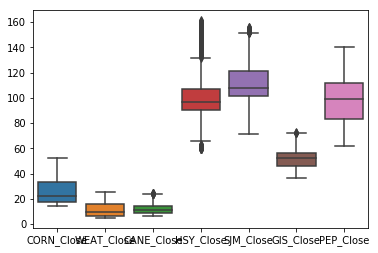

In [23]:
close = data[['CORN_Close','WEAT_Close', 'CANE_Close','HSY_Close', 'SJM_Close', 
               'GIS_Close', 'PEP_Close']]
sns.boxplot(data = close)

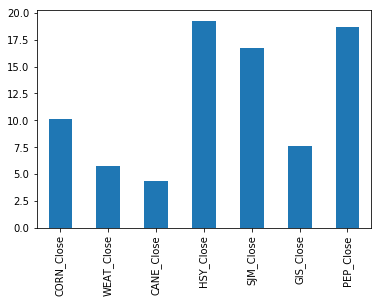

In [24]:
close.std().plot(kind = 'bar')

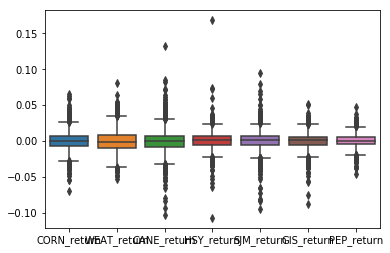

In [25]:
#HSY has greatest outliars for return
returns = data[['CORN_return','WEAT_return', 'CANE_return','HSY_return', 'SJM_return', 
               'GIS_return', 'PEP_return']]
sns.boxplot(data = returns)

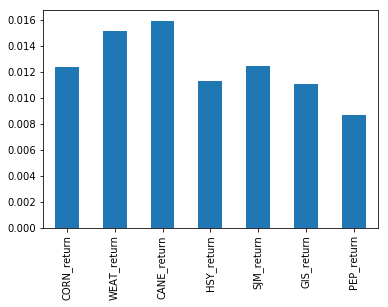

In [26]:
#CANE has greatest volatility
returns.std().plot(kind = 'bar')

[**Bollinger Bands**](https://www.investopedia.com/terms/b/bollingerbands.asp)
- technical indicator to analyze standard deviation over time
- comprised of three lines: the simple moving average (SMA) and two bands placed one standard deviation above and below the SMA
    - SMA is smoothed out version of the stock's price history: slower to respond to changes
- outer bands mirror those changes to reflect the corresponding adjustment to the standard deviation 
- The standard deviation is shown by the width of the Bollinger Bands
    - The wider the Bollinger Bands, the more volatile a stock's price within the given period. 
    - A stock with low volatility has very narrow Bollinger Bands that sit close to the SMA.
    
- [setting up Bollinger Bands](https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300)

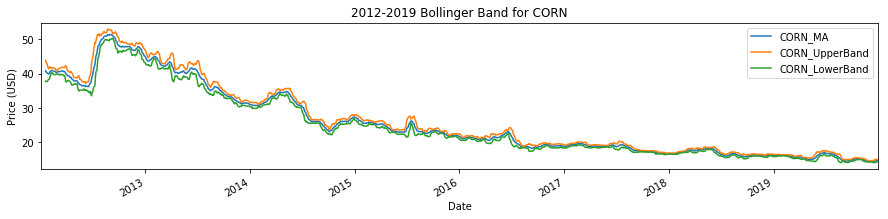

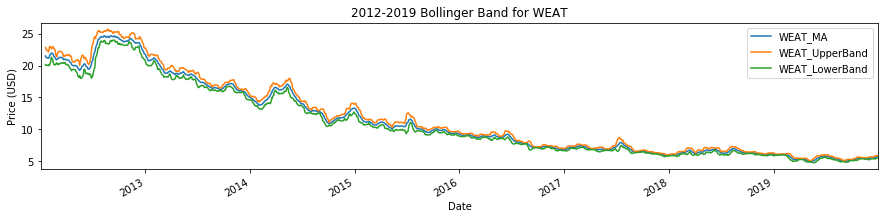

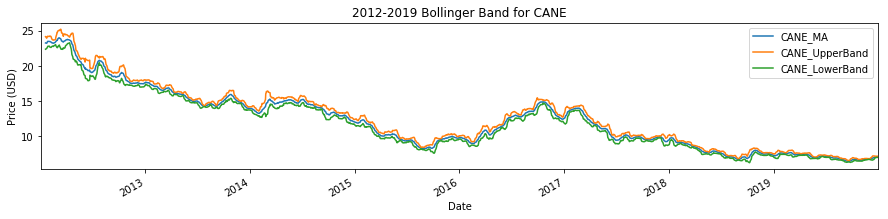

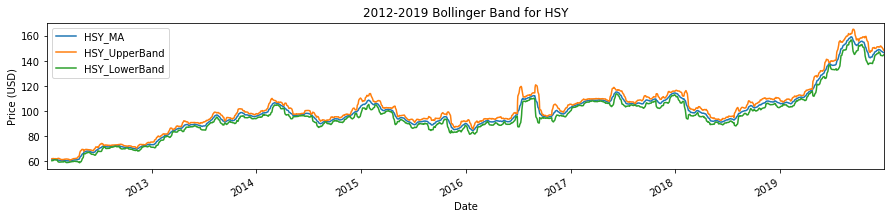

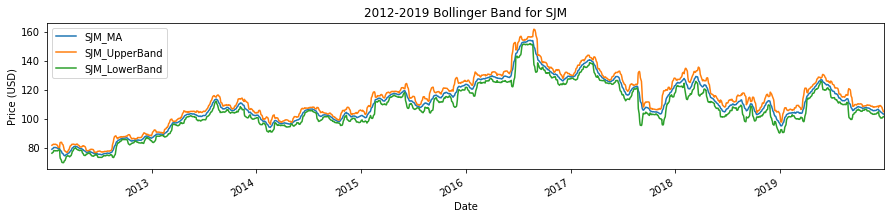

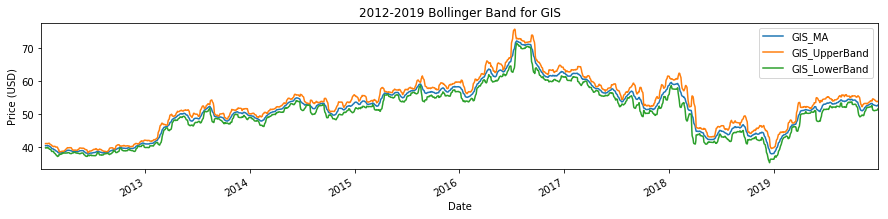

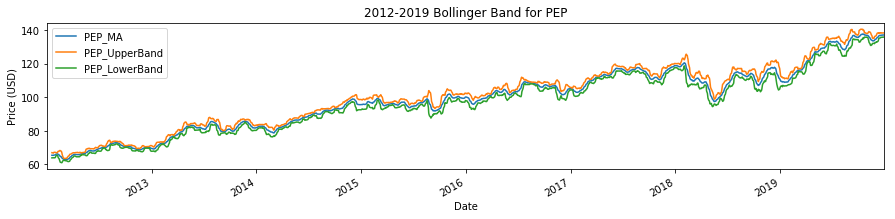

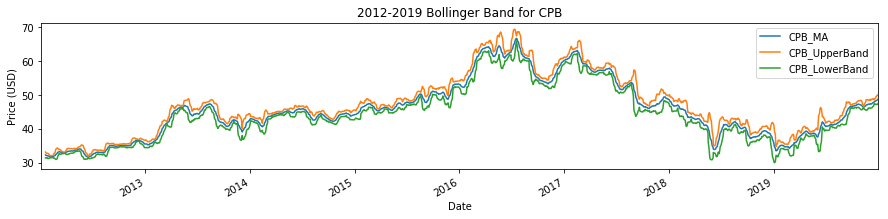

In [27]:
#source: https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300

#Bollinger bands for daily data

#set moving average for CORN_Close--LOW VOLATILITY
data['CORN_MA'] = data['CORN_Close'].rolling(12).mean()
#set standard deviation for sample
data['CORN_STD'] = data['CORN_Close'].rolling(12).std() 
#set upper and lower band
data['CORN_UpperBand'] = data['CORN_MA'] + (data['CORN_STD'] * 2)
data['CORN_LowerBand'] = data['CORN_MA'] - (data['CORN_STD'] * 2)
diff_CORN = data['CORN_UpperBand'] - data['CORN_LowerBand']
#Plot Bollinger Band
data[['CORN_MA', 'CORN_UpperBand', 'CORN_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CORN')
plt.ylabel('Price (USD)')
plt.show()

#WEAT_Close-- LOW VOLATILITY
data['WEAT_MA'] = data['WEAT_Close'].rolling(12).mean()
data['WEAT_STD'] = data['WEAT_Close'].rolling(12).std() 
data['WEAT_UpperBand'] = data['WEAT_MA'] + (data['WEAT_STD'] * 2)
data['WEAT_LowerBand'] = data['WEAT_MA'] - (data['WEAT_STD'] * 2)
diff_WEAT = data['WEAT_UpperBand'] - data['WEAT_LowerBand']
#Plot Bollinger Band
data[['WEAT_MA', 'WEAT_UpperBand', 'WEAT_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for WEAT')
plt.ylabel('Price (USD)')
plt.show()

#CANE_Close-- LOW VOLATILITY
data['CANE_MA'] = data['CANE_Close'].rolling(12).mean()
data['CANE_STD'] = data['CANE_Close'].rolling(12).std() 
data['CANE_UpperBand'] = data['CANE_MA'] + (data['CANE_STD'] * 2)
data['CANE_LowerBand'] = data['CANE_MA'] - (data['CANE_STD'] * 2)
diff_CANE = data['CANE_UpperBand'] - data['CANE_LowerBand']
#Plot Bollinger Band
data[['CANE_MA', 'CANE_UpperBand', 'CANE_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CANE')
plt.ylabel('Price (USD)')
plt.show()

#HSY_Close-- LOW VOLATILITY
data['HSY_MA'] = data['HSY_Close'].rolling(12).mean()
data['HSY_STD'] = data['HSY_Close'].rolling(12).std() 
data['HSY_UpperBand'] = data['HSY_MA'] + (data['HSY_STD'] * 2)
data['HSY_LowerBand'] = data['HSY_MA'] - (data['HSY_STD'] * 2)
diff_HSY = data['HSY_UpperBand'] - data['HSY_LowerBand']
#Plot Bollinger Band
data[['HSY_MA', 'HSY_UpperBand', 'HSY_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for HSY')
plt.ylabel('Price (USD)')
plt.show()

#SJM_Close-- LOW VOLATILITY
data['SJM_MA'] = data['SJM_Close'].rolling(12).mean()
data['SJM_STD'] = data['SJM_Close'].rolling(12).std() 
data['SJM_UpperBand'] = data['SJM_MA'] + (data['SJM_STD'] * 2)
data['SJM_LowerBand'] = data['SJM_MA'] - (data['SJM_STD'] * 2)
diff_SJM = data['SJM_UpperBand'] - data['SJM_LowerBand']
#Plot Bollinger Band
data[['SJM_MA', 'SJM_UpperBand', 'SJM_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for SJM')
plt.ylabel('Price (USD)')
plt.show()

#GIS_Close-- LOW VOLATILITY
data['GIS_MA'] = data['GIS_Close'].rolling(12).mean()
data['GIS_STD'] = data['GIS_Close'].rolling(12).std() 
data['GIS_UpperBand'] = data['GIS_MA'] + (data['GIS_STD'] * 2)
data['GIS_LowerBand'] = data['GIS_MA'] - (data['GIS_STD'] * 2)
diff_GIS = data['GIS_UpperBand'] - data['GIS_LowerBand']
#Plot Bollinger Band
data[['GIS_MA', 'GIS_UpperBand', 'GIS_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for GIS')
plt.ylabel('Price (USD)')
plt.show()

#PEP_Close-- LOW VOLATILITY
data['PEP_MA'] = data['PEP_Close'].rolling(12).mean()
data['PEP_STD'] = data['PEP_Close'].rolling(12).std() 
data['PEP_UpperBand'] = data['PEP_MA'] + (data['PEP_STD'] * 2)
data['PEP_LowerBand'] = data['PEP_MA'] - (data['PEP_STD'] * 2)
diff_PEP = data['PEP_UpperBand'] - data['PEP_LowerBand']
#Plot Bollinger Band
data[['PEP_MA', 'PEP_UpperBand', 'PEP_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for PEP')
plt.ylabel('Price (USD)')
plt.show()

#CPB_Close-- LOW VOLATILITY
data['CPB_MA'] = data['CPB_Close'].rolling(12).mean()
data['CPB_STD'] = data['CPB_Close'].rolling(12).std() 
data['CPB_UpperBand'] = data['CPB_MA'] + (data['CPB_STD'] * 2)
data['CPB_LowerBand'] = data['CPB_MA'] - (data['CPB_STD'] * 2)
diff_CPB = data['CPB_UpperBand'] - data['CPB_LowerBand']
#Plot Bollinger Band
data[['CPB_MA', 'CPB_UpperBand', 'CPB_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CPB')
plt.ylabel('Price (USD)')
plt.show()

In [28]:
#Looking to find the max width in the Bollinger Band and where that max is in dataset
print('Max Bollinger Band width for CORN', diff_CORN.max())
print (diff_CORN.idxmax())
print('Max Bollinger Band width for WEAT', diff_WEAT.max())
print (diff_WEAT.idxmax())
print('Max Bollinger Band width for CANE', diff_CANE.max())
print (diff_CANE.idxmax())
print('Max Bollinger Band width for HSY', diff_HSY.max())
print (diff_HSY.idxmax())
print('Max Bollinger Band width for SJM', diff_SJM.max())
print (diff_SJM.idxmax())
print('Max Bollinger Band width for GIS', diff_GIS.max())
print (diff_GIS.idxmax())
print('Max Bollinger Band width for PEP', diff_PEP.max())
print (diff_PEP.idxmax())
print('Max Bollinger Band width for CPB', diff_CPB.max())
print (diff_CPB.idxmax())

#average width of the bolinger bands
print('Average Bollinger Band width for CORN', diff_CORN.mean())
print('Average Bollinger Band width for WEAT', diff_WEAT.mean())
print('Average Bollinger Band width for CANE', diff_CANE.mean())
print('Average Bollinger Band width for HSY', diff_HSY.mean())
print('Average Bollinger Band width for SJM', diff_SJM.mean())
print('Average Bollinger Band width for GIS', diff_GIS.mean())
print('Average Bollinger Band width for PEP', diff_PEP.mean())
print('Average Bollinger Band width for CPB', diff_CPB.mean())

Max Bollinger Band width for CORN 12.31873812900119
2012-07-09 00:00:00
Max Bollinger Band width for WEAT 5.028105251905735
2012-07-05 00:00:00
Max Bollinger Band width for CANE 3.5262135241902186
2012-04-24 00:00:00
Max Bollinger Band width for HSY 29.217306618862892
2016-07-08 00:00:00
Max Bollinger Band width for SJM 34.057422454472345
2017-08-31 00:00:00
Max Bollinger Band width for GIS 12.914008837014492
2018-03-28 00:00:00
Max Bollinger Band width for PEP 16.778171605518622
2018-02-12 00:00:00
Max Bollinger Band width for CPB 12.690044296314525
2018-05-24 00:00:00
Average Bollinger Band width for CORN 1.6672275566225716
Average Bollinger Band width for WEAT 0.9025873581058785
Average Bollinger Band width for CANE 0.8822487753685238
Average Bollinger Band width for HSY 5.346981435583102
Average Bollinger Band width for SJM 6.630216905256271
Average Bollinger Band width for GIS 2.8265551793808887
Average Bollinger Band width for PEP 4.329263187958113
Average Bollinger Band width fo

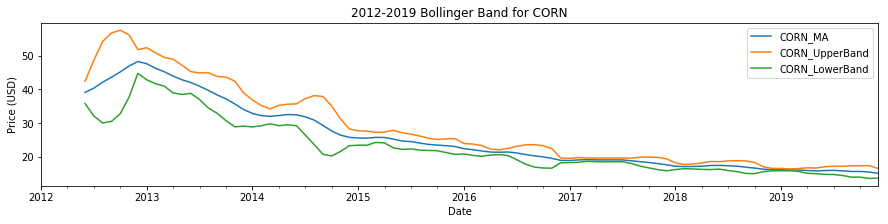

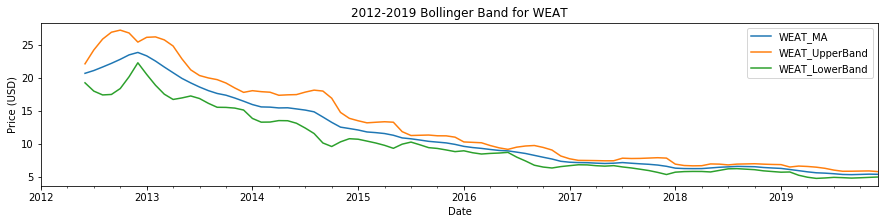

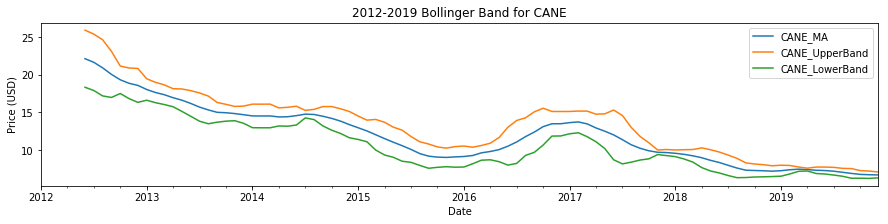

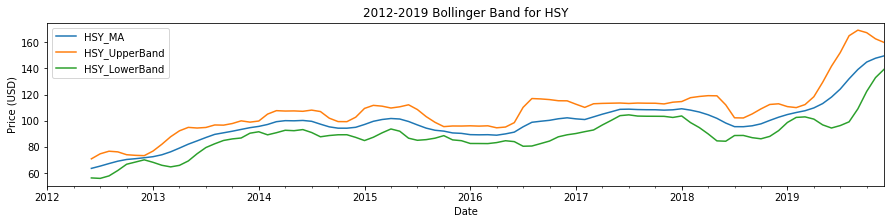

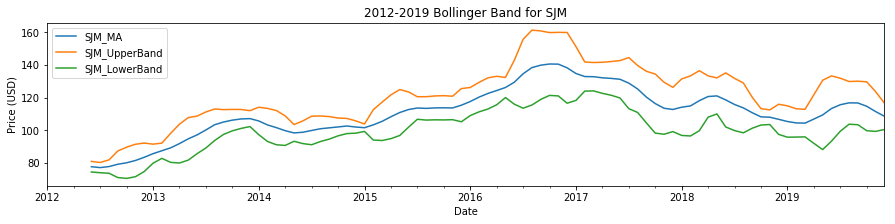

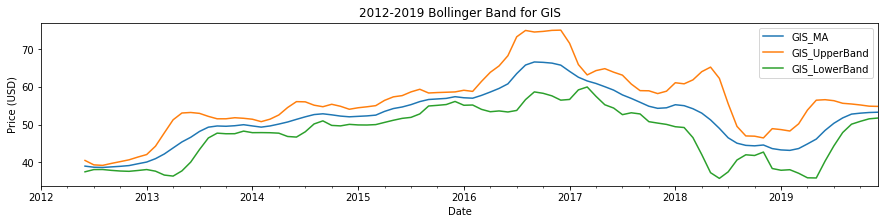

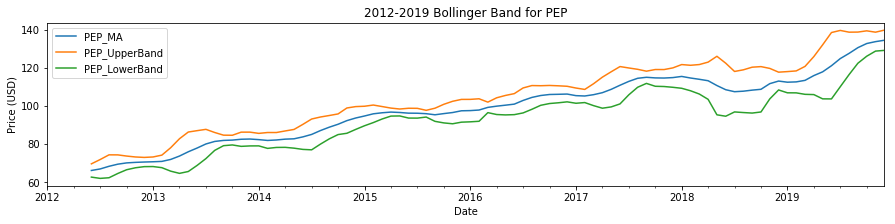

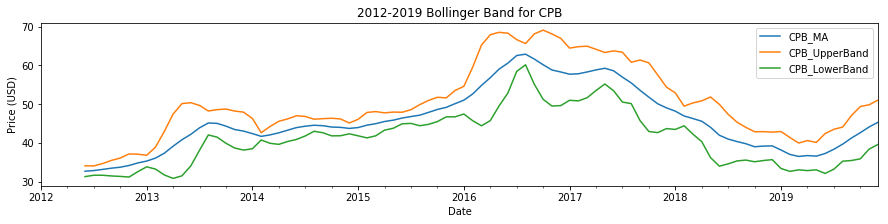

In [29]:
#source: https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300

#Bollinger bands for monthly data

#set moving average for CORN_Close--LOW VOLATILITY
data_month['CORN_MA'] = data_month['CORN_Close'].rolling(6).mean()
#set standard deviation for sample
data_month['CORN_STD'] = data_month['CORN_Close'].rolling(6).std() 
#set upper and lower band
data_month['CORN_UpperBand'] = data_month['CORN_MA'] + (data_month['CORN_STD'] * 2)
data_month['CORN_LowerBand'] = data_month['CORN_MA'] - (data_month['CORN_STD'] * 2)
diff_CORN2 = data_month['CORN_UpperBand'] - data_month['CORN_LowerBand']
#Plot Bollinger Band
data_month[['CORN_MA', 'CORN_UpperBand', 'CORN_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CORN')
plt.ylabel('Price (USD)')
plt.show()

#WEAT_Close-- LOW VOLATILITY
data_month['WEAT_MA'] = data_month['WEAT_Close'].rolling(6).mean()
data_month['WEAT_STD'] = data_month['WEAT_Close'].rolling(6).std() 
data_month['WEAT_UpperBand'] = data_month['WEAT_MA'] + (data_month['WEAT_STD'] * 2)
data_month['WEAT_LowerBand'] = data_month['WEAT_MA'] - (data_month['WEAT_STD'] * 2)
diff_WEAT2 = data_month['WEAT_UpperBand'] - data_month['WEAT_LowerBand']
#Plot Bollinger Band
data_month[['WEAT_MA', 'WEAT_UpperBand', 'WEAT_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for WEAT')
plt.ylabel('Price (USD)')
plt.show()

#CANE_Close-- LOW VOLATILITY
data_month['CANE_MA'] = data_month['CANE_Close'].rolling(6).mean()
data_month['CANE_STD'] = data_month['CANE_Close'].rolling(6).std() 
data_month['CANE_UpperBand'] = data_month['CANE_MA'] + (data_month['CANE_STD'] * 2)
data_month['CANE_LowerBand'] = data_month['CANE_MA'] - (data_month['CANE_STD'] * 2)
diff_CANE2 = data_month['CANE_UpperBand'] - data_month['CANE_LowerBand']
#Plot Bollinger Band
data_month[['CANE_MA', 'CANE_UpperBand', 'CANE_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CANE')
plt.ylabel('Price (USD)')
plt.show()

#HSY_Close-- LOW VOLATILITY
data_month['HSY_MA'] = data_month['HSY_Close'].rolling(6).mean()
data_month['HSY_STD'] = data_month['HSY_Close'].rolling(6).std() 
data_month['HSY_UpperBand'] = data_month['HSY_MA'] + (data_month['HSY_STD'] * 2)
data_month['HSY_LowerBand'] = data_month['HSY_MA'] - (data_month['HSY_STD'] * 2)
diff_HSY2 = data_month['HSY_UpperBand'] - data_month['HSY_LowerBand']
#Plot Bollinger Band
data_month[['HSY_MA', 'HSY_UpperBand', 'HSY_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for HSY')
plt.ylabel('Price (USD)')
plt.show()

#SJM_Close-- LOW VOLATILITY
data_month['SJM_MA'] = data_month['SJM_Close'].rolling(6).mean()
data_month['SJM_STD'] = data_month['SJM_Close'].rolling(6).std() 
data_month['SJM_UpperBand'] = data_month['SJM_MA'] + (data_month['SJM_STD'] * 2)
data_month['SJM_LowerBand'] = data_month['SJM_MA'] - (data_month['SJM_STD'] * 2)
diff_SJM2 = data_month['SJM_UpperBand'] - data_month['SJM_LowerBand']
#Plot Bollinger Band
data_month[['SJM_MA', 'SJM_UpperBand', 'SJM_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for SJM')
plt.ylabel('Price (USD)')
plt.show()

#GIS_Close-- LOW VOLATILITY
data_month['GIS_MA'] = data_month['GIS_Close'].rolling(6).mean()
data_month['GIS_STD'] = data_month['GIS_Close'].rolling(6).std() 
data_month['GIS_UpperBand'] = data_month['GIS_MA'] + (data_month['GIS_STD'] * 2)
data_month['GIS_LowerBand'] = data_month['GIS_MA'] - (data_month['GIS_STD'] * 2)
diff_GIS2 = data_month['GIS_UpperBand'] - data_month['GIS_LowerBand']
#Plot Bollinger Band
data_month[['GIS_MA', 'GIS_UpperBand', 'GIS_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for GIS')
plt.ylabel('Price (USD)')
plt.show()

#PEP_Close-- LOW VOLATILITY
data_month['PEP_MA'] = data_month['PEP_Close'].rolling(6).mean()
data_month['PEP_STD'] = data_month['PEP_Close'].rolling(6).std() 
data_month['PEP_UpperBand'] = data_month['PEP_MA'] + (data_month['PEP_STD'] * 2)
data_month['PEP_LowerBand'] = data_month['PEP_MA'] - (data_month['PEP_STD'] * 2)
diff_PEP2 = data_month['PEP_UpperBand'] - data_month['PEP_LowerBand']
#Plot Bollinger Band
data_month[['PEP_MA', 'PEP_UpperBand', 'PEP_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for PEP')
plt.ylabel('Price (USD)')
plt.show()

#CPB_Close-- LOW VOLATILITY
data_month['CPB_MA'] = data_month['CPB_Close'].rolling(6).mean()
data_month['CPB_STD'] = data_month['CPB_Close'].rolling(6).std() 
data_month['CPB_UpperBand'] = data_month['CPB_MA'] + (data_month['CPB_STD'] * 2)
data_month['CPB_LowerBand'] = data_month['CPB_MA'] - (data_month['CPB_STD'] * 2)
diff_CPB2 = data_month['CPB_UpperBand'] - data_month['CPB_LowerBand']
#Plot Bollinger Band
data_month[['CPB_MA', 'CPB_UpperBand', 'CPB_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for CPB')
plt.ylabel('Price (USD)')
plt.show()

In [30]:
#Looking to find the max width in the Bollinger Band and where that max is in dataset
#much more volatility in the monthly data
print('Max Bollinger Band width for CORN', diff_CORN2.max())
print (diff_CORN2.idxmax())
print('Max Bollinger Band width for WEAT', diff_WEAT2.max())
print (diff_WEAT2.idxmax())
print('Max Bollinger Band width for CANE', diff_CANE2.max())
print (diff_CANE2.idxmax())
print('Max Bollinger Band width for HSY', diff_HSY2.max())
print (diff_HSY2.idxmax())
print('Max Bollinger Band width for SJM', diff_SJM2.max())
print (diff_SJM2.idxmax())
print('Max Bollinger Band width for GIS', diff_GIS2.max())
print (diff_GIS2.idxmax())
print('Max Bollinger Band width for PEP', diff_PEP2.max())
print (diff_PEP2.idxmax())
print('Max Bollinger Band width for CPB', diff_CPB2.max())
print (diff_CPB2.idxmax())

#average width of the bolinger bands
print('Average Bollinger Band width for CORN', diff_CORN2.mean())
print('Average Bollinger Band width for WEAT', diff_WEAT2.mean())
print('Average Bollinger Band width for CANE', diff_CANE2.mean())
print('Average Bollinger Band width for HSY', diff_HSY2.mean())
print('Average Bollinger Band width for SJM', diff_SJM2.mean())
print('Average Bollinger Band width for GIS', diff_GIS2.mean())
print('Average Bollinger Band width for PEP', diff_PEP2.mean())
print('Average Bollinger Band width for CPB', diff_CPB2.mean())

Max Bollinger Band width for CORN 26.22562139554456
2012-09-30 00:00:00
Max Bollinger Band width for WEAT 9.41291194134898
2012-09-30 00:00:00
Max Bollinger Band width for CANE 7.578428818861518
2012-06-30 00:00:00
Max Bollinger Band width for HSY 65.76704644482163
2019-08-31 00:00:00
Max Bollinger Band width for SJM 45.84853713796127
2016-08-31 00:00:00
Max Bollinger Band width for GIS 27.938348231136857
2018-05-31 00:00:00
Max Bollinger Band width for PEP 34.856392329882965
2019-06-30 00:00:00
Max Bollinger Band width for CPB 22.169349335152205
2016-04-30 00:00:00
Average Bollinger Band width for CORN 5.7153022839022505
Average Bollinger Band width for WEAT 2.8140212734227985
Average Bollinger Band width for CANE 2.9449912771607822
Average Bollinger Band width for HSY 19.11313721974304
Average Bollinger Band width for SJM 21.90805834798359
Average Bollinger Band width for GIS 8.59560393026415
Average Bollinger Band width for PEP 12.395413890835613
Average Bollinger Band width for CPB

[**Maximum Drawdown (MDD)**](https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp)
- Another way of dealing with volatility is to find the maximum drawdown
- the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained
- Maximum drawdown is an indicator of downside risk over a specified time period
- expressed in percentage terms
- A low maximum drawdown is preferred
    - If an investment never lost a penny, the maximum drawdown would be zero

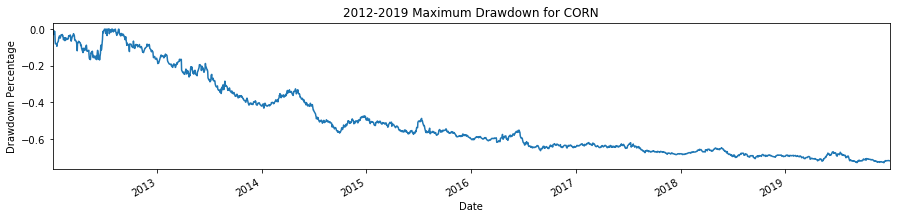

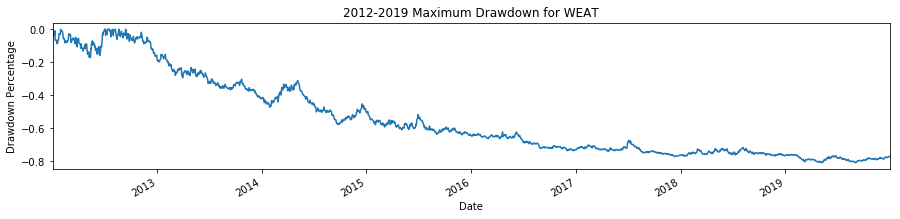

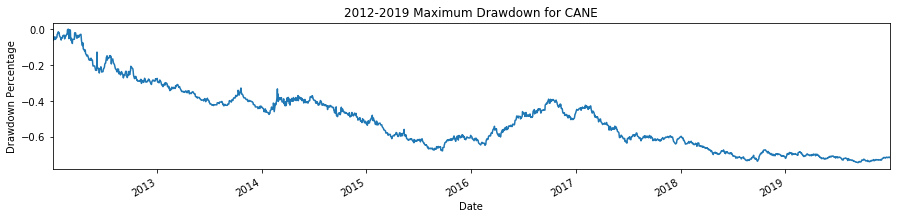

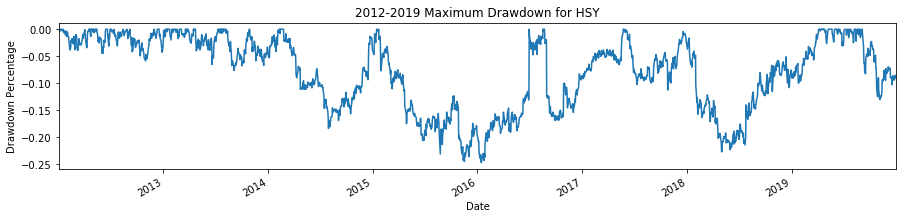

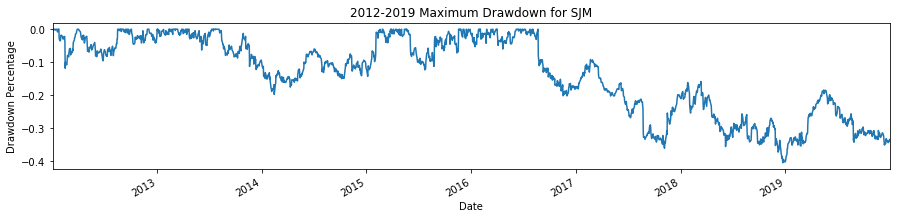

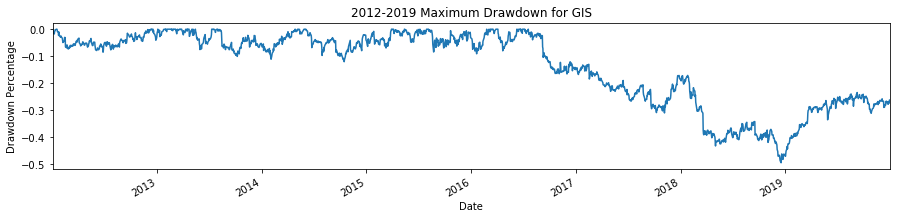

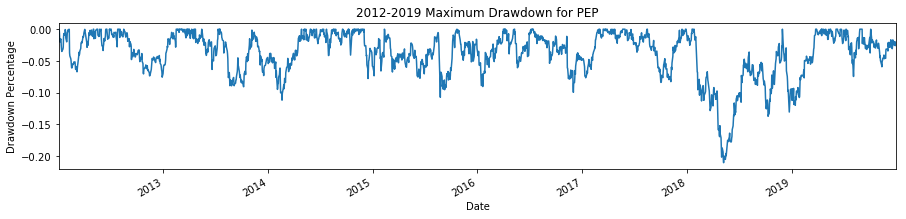

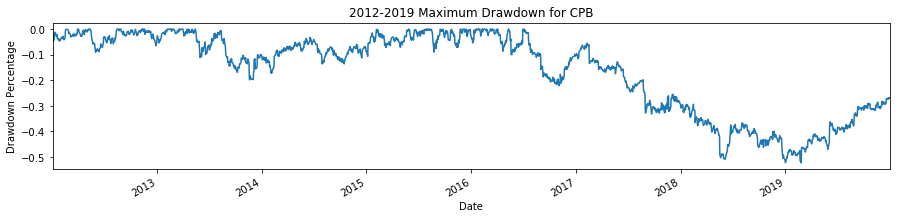

In [31]:
#take the stock cumulative return and put into formula with maximum cumulative return
#https://seekingalpha.com/instablog/42079636-kayode-omotosho/5377452-computing-maximum-drawdown-of-stocks-in-python

#maximum drawdown for daily data
#CORN_Close Max Drawdown
CORN_CumMax = data['CORN_cum_return'].cummax()
data['CORN_MaxDrawdown'] = ((data['CORN_cum_return']) - CORN_CumMax)/CORN_CumMax
data['CORN_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CORN')
plt.ylabel('Drawdown Percentage')
plt.show()

#WEAT_Close Max Drawdown--GREATEST DRAWDOWN
WEAT_CumMax = data['WEAT_cum_return'].cummax()
data['WEAT_MaxDrawdown'] = ((data['WEAT_cum_return']) - WEAT_CumMax)/WEAT_CumMax
data['WEAT_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for WEAT')
plt.ylabel('Drawdown Percentage')
plt.show()

#CANE_Close Max Drawdown
CANE_CumMax = data['CANE_cum_return'].cummax()
data['CANE_MaxDrawdown'] = ((data['CANE_cum_return']) - CANE_CumMax)/CANE_CumMax
data['CANE_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CANE')
plt.ylabel('Drawdown Percentage')
plt.show()

#HSY_Close Max Drawdown
HSY_CumMax = data['HSY_cum_return'].cummax()
data['HSY_MaxDrawdown'] = ((data['HSY_cum_return']) - HSY_CumMax)/HSY_CumMax
data['HSY_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for HSY')
plt.ylabel('Drawdown Percentage')
plt.show()

#SJM_Close Max Drawdown
SJM_CumMax = data['SJM_cum_return'].cummax()
data['SJM_MaxDrawdown'] = ((data['SJM_cum_return']) - SJM_CumMax)/SJM_CumMax
data['SJM_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for SJM')
plt.ylabel('Drawdown Percentage')
plt.show()

#GIS_Close Max Drawdown--BIG DRAWDOWN
GIS_CumMax = data['GIS_cum_return'].cummax()
data['GIS_MaxDrawdown'] = ((data['GIS_cum_return']) - GIS_CumMax)/GIS_CumMax
data['GIS_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for GIS')
plt.ylabel('Drawdown Percentage')
plt.show()

#PEP_Close Max Drawdown
PEP_CumMax = data['PEP_cum_return'].cummax()
data['PEP_MaxDrawdown'] = ((data['PEP_cum_return']) - PEP_CumMax)/PEP_CumMax
data['PEP_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for PEP')
plt.ylabel('Drawdown Percentage')
plt.show()

#CPB_Close Max Drawdown--BIG DRAWDOWN
CPB_CumMax = data['CPB_cum_return'].cummax()
data['CPB_MaxDrawdown'] = ((data['CPB_cum_return']) - CPB_CumMax)/CPB_CumMax
data['CPB_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CPB')
plt.ylabel('Drawdown Percentage')
plt.show()

In [32]:
#Average max drawdown for daily data
print('Avg CORN_MaxDrawdown for CORN', data['CORN_MaxDrawdown'].mean())
print('Avg WEAT_MaxDrawdown for CORN', data['WEAT_MaxDrawdown'].mean())
print('Avg CANE_MaxDrawdown for CORN', data['CANE_MaxDrawdown'].mean())
print('Avg HSY_MaxDrawdown for CORN', data['HSY_MaxDrawdown'].mean())
print('Avg SJM_MaxDrawdown for CORN', data['SJM_MaxDrawdown'].mean())
print('Avg GIS_MaxDrawdown for CORN', data['GIS_MaxDrawdown'].mean())
print('Avg PEP_MaxDrawdown for CORN', data['PEP_MaxDrawdown'].mean())
print('Avg CPB_MaxDrawdown for CORN', data['CPB_MaxDrawdown'].mean())

Avg CORN_MaxDrawdown for CORN -0.5000399205864924
Avg WEAT_MaxDrawdown for CORN -0.5439004089156839
Avg CANE_MaxDrawdown for CORN -0.5071963706394718
Avg HSY_MaxDrawdown for CORN -0.08064209184334784
Avg SJM_MaxDrawdown for CORN -0.13609305853569706
Avg GIS_MaxDrawdown for CORN -0.13714684061424795
Avg PEP_MaxDrawdown for CORN -0.03813361212043794
Avg CPB_MaxDrawdown for CORN -0.16036030114922764


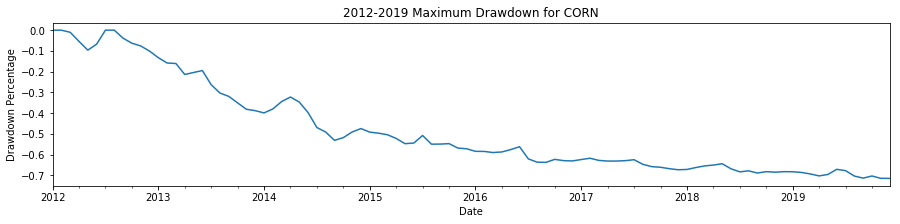

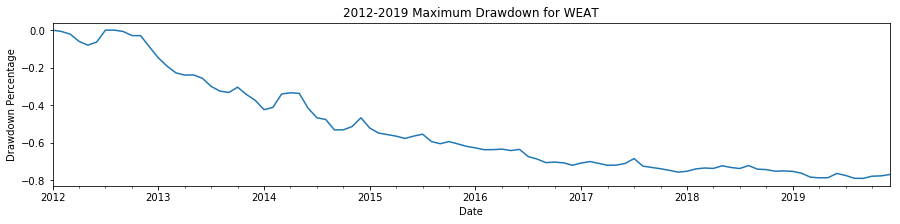

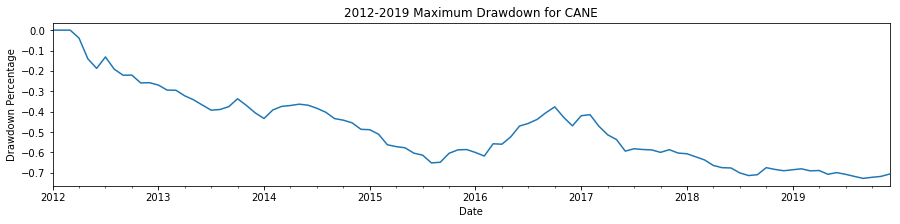

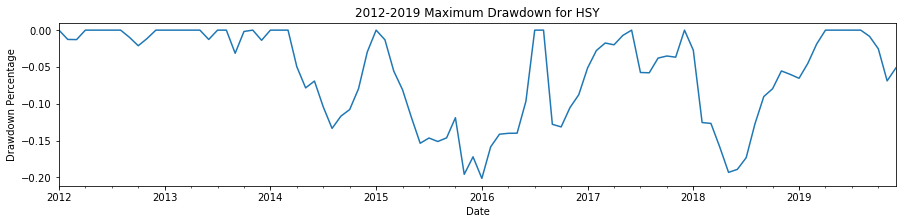

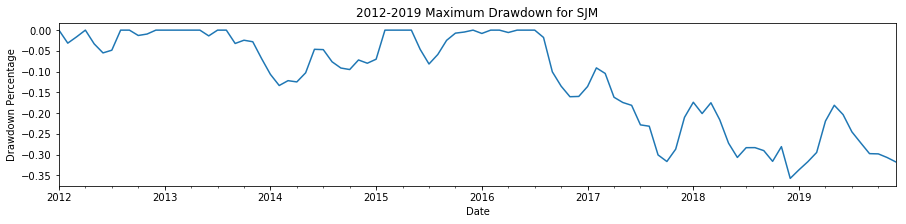

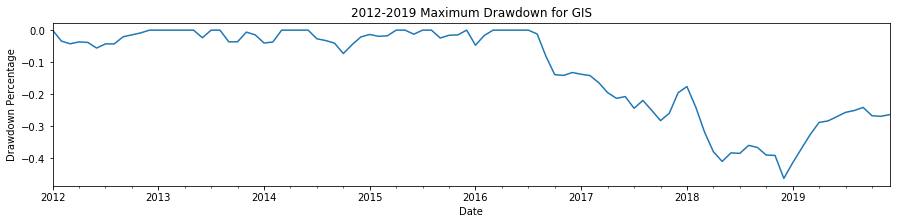

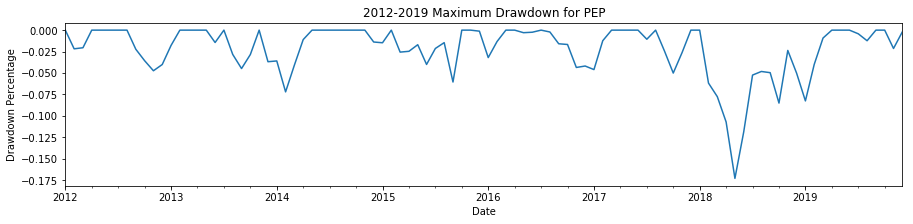

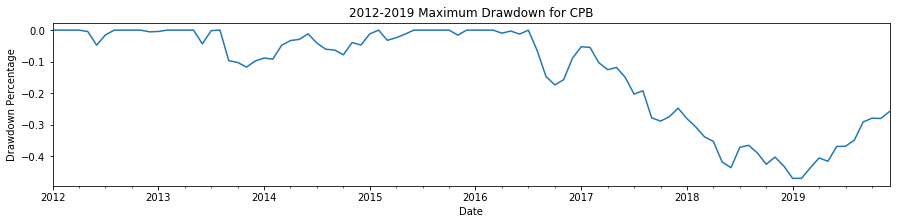

In [33]:
#take the stock cumulative return and put into formula with maximum cumulative return
#https://seekingalpha.com/instablog/42079636-kayode-omotosho/5377452-computing-maximum-drawdown-of-stocks-in-python

#maximum drawdown for monthly data
#CORN_Close Max Drawdown
CORN_CumMax = data_month['CORN_cum_return'].cummax()
data_month['CORN_MaxDrawdown'] = ((data_month['CORN_cum_return']) - CORN_CumMax)/CORN_CumMax
data_month['CORN_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CORN')
plt.ylabel('Drawdown Percentage')
plt.show()

#WEAT_Close Max Drawdown--GREATEST DRAWDOWN
WEAT_CumMax = data_month['WEAT_cum_return'].cummax()
data_month['WEAT_MaxDrawdown'] = ((data_month['WEAT_cum_return']) - WEAT_CumMax)/WEAT_CumMax
data_month['WEAT_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for WEAT')
plt.ylabel('Drawdown Percentage')
plt.show()

#CANE_Close Max Drawdown
CANE_CumMax = data_month['CANE_cum_return'].cummax()
data_month['CANE_MaxDrawdown'] = ((data_month['CANE_cum_return']) - CANE_CumMax)/CANE_CumMax
data_month['CANE_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CANE')
plt.ylabel('Drawdown Percentage')
plt.show()

#HSY_Close Max Drawdown
HSY_CumMax = data_month['HSY_cum_return'].cummax()
data_month['HSY_MaxDrawdown'] = ((data_month['HSY_cum_return']) - HSY_CumMax)/HSY_CumMax
data_month['HSY_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for HSY')
plt.ylabel('Drawdown Percentage')
plt.show()

#SJM_Close Max Drawdown
SJM_CumMax = data_month['SJM_cum_return'].cummax()
data_month['SJM_MaxDrawdown'] = ((data_month['SJM_cum_return']) - SJM_CumMax)/SJM_CumMax
data_month['SJM_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for SJM')
plt.ylabel('Drawdown Percentage')
plt.show()

#GIS_Close Max Drawdown--BIG DRAWDOWN
GIS_CumMax = data_month['GIS_cum_return'].cummax()
data_month['GIS_MaxDrawdown'] = ((data_month['GIS_cum_return']) - GIS_CumMax)/GIS_CumMax
data_month['GIS_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for GIS')
plt.ylabel('Drawdown Percentage')
plt.show()

#PEP_Close Max Drawdown
PEP_CumMax = data_month['PEP_cum_return'].cummax()
data_month['PEP_MaxDrawdown'] = ((data_month['PEP_cum_return']) - PEP_CumMax)/PEP_CumMax
data_month['PEP_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for PEP')
plt.ylabel('Drawdown Percentage')
plt.show()

#CPB_Close Max Drawdown--BIG DRAWDOWN
CPB_CumMax = data_month['CPB_cum_return'].cummax()
data_month['CPB_MaxDrawdown'] = ((data_month['CPB_cum_return']) - CPB_CumMax)/CPB_CumMax
data_month['CPB_MaxDrawdown'].plot(figsize=(15,3))
plt.title('2012-2019 Maximum Drawdown for CPB')
plt.ylabel('Drawdown Percentage')
plt.show()

In [34]:
#Average max drawdown for monthly data
print('Avg CORN_MaxDrawdown for CORN', data_month['CORN_MaxDrawdown'].mean())
print('Avg WEAT_MaxDrawdown for CORN', data_month['WEAT_MaxDrawdown'].mean())
print('Avg CANE_MaxDrawdown for CORN', data_month['CANE_MaxDrawdown'].mean())
print('Avg HSY_MaxDrawdown for CORN', data_month['HSY_MaxDrawdown'].mean())
print('Avg SJM_MaxDrawdown for CORN', data_month['SJM_MaxDrawdown'].mean())
print('Avg GIS_MaxDrawdown for CORN', data_month['GIS_MaxDrawdown'].mean())
print('Avg PEP_MaxDrawdown for CORN', data_month['PEP_MaxDrawdown'].mean())
print('Avg CPB_MaxDrawdown for CORN', data_month['CPB_MaxDrawdown'].mean())

Avg CORN_MaxDrawdown for CORN -0.484000236377343
Avg WEAT_MaxDrawdown for CORN -0.528092604678688
Avg CANE_MaxDrawdown for CORN -0.48543344275240985
Avg HSY_MaxDrawdown for CORN -0.058514430805259844
Avg SJM_MaxDrawdown for CORN -0.11678348633157465
Avg GIS_MaxDrawdown for CORN -0.12204014056178762
Avg PEP_MaxDrawdown for CORN -0.02199833076150802
Avg CPB_MaxDrawdown for CORN -0.13469489600670811


In [35]:
#Save new dataset to csv
data.to_csv('CapstoneCalculatedData.csv')